In [1]:
# for data transformation
import numpy as np
# for visualizing the data
import matplotlib.pyplot as plt
# for opening the media file
import scipy.io.wavfile as wavfile

import re
import librosa
import scipy
# for dataframe manipulation
import pandas as pd

In [67]:
wavo = '/home/jacs/Documents/DataScience/Personal/song_similarity_audio/TinySOL/Brass/Trumpet_C/ordinario/TpC-ord-D4-ff-N-T27u.wav'

In [27]:
Fs, audio = wavfile.read(wavo)

In [29]:
#mfccs = librosa.feature.mfcc(y=audio, sr=Fs)
#print(mfccs.shape)

In [68]:
x, fs = librosa.load(wavo)
#librosa.display.waveplot(x, sr=fs)

In [130]:
xx= x#[:5*fs]

In [133]:
mfccs = librosa.feature.mfcc(y=xx, sr=fs, norm='ortho')#, n_fft=26)
print(mfccs.shape)

(20, 277)


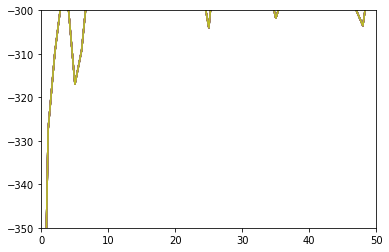

In [136]:
for i in range(1,mfccs.shape[0]):
    plt.plot(mfccs[0])
    plt.xlim(0,50)
    plt.ylim(-350,-300)

In [98]:
sp = scipy.fft.fft(xx)
freq = scipy.fft.fftfreq(len(xx),fs)

/home/jacs/jorgenv/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(0.0, 2e-05)

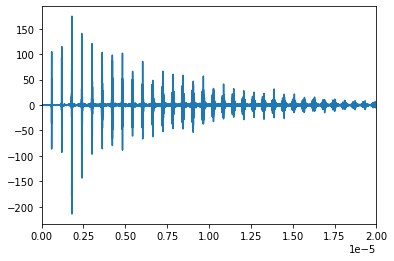

In [99]:
plt.plot(freq,sp)
plt.xlim(0,0.00002)

In [95]:
plop = len(xx)
plop2= mfccs.shape[1]

print((plop/plop2)/fs)

0.02314814814814815


In [90]:
mfccs[:10,:].shape

(10, 216)

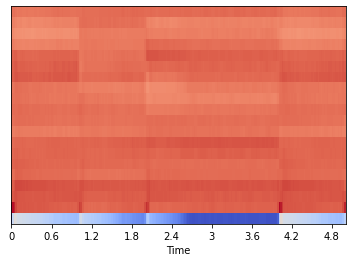

In [50]:
librosa.display.specshow(mfccs, sr=fs, x_axis='time')

In [26]:
mfccs[0]`

array([-470.568  , -234.81117, -179.48773, ..., -551.5514 , -553.6807 ,
       -555.83887], dtype=float32)

In [22]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))


NameError: name 'sklearn' is not defined

In [2]:
flop = 'TOP_10_MOST_POPULAR_TRUMPET_SONGS_(with_Sheet_Music_Notes)'

In [3]:
re.sub('[)!$/(]','',flop)

'TOP_10_MOST_POPULAR_TRUMPET_SONGS_with_Sheet_Music_Notes'

In [2]:
Fs, audio = wavfile.read('The_Most_Beautiful_Trumpet_Solo.wav')

ValueError: File format b'\x00\x00\x00\x18' not understood. Only 'RIFF' and 'RIFX' supported.

In [2]:
#top_2_idx = np.argsort(sp)[-40:]
#listo_freq = [freq[i] for i in top_2_idx]

In [3]:
# Creates different chunks of data from a signal
# Includes half the past chunk
# Say, you have a 1s signal, you want windows of 0.25s 
# with this methodology you will have each window that includes half of the past window

def chunks(xs, n):
    # xs: signal
    # n: times you want to split the signal
    # len(return): n(even): 2n - 1
    #            : n(odd): 2n +1
    ms = int(len(xs)/n)
    return list(xs[i-int(ms/2):i+int(ms/2)] for i in range(int(ms/2), len(xs), int(ms/2)))
#    return list(xs[i:i+ms] for i in range(0, len(xs), ms))

In [4]:
def suma_repetidos(freq_int, sp):
    sp_int = []
    frequ_int = []
    for i in range(1,len(freq_int)):
        frequ = int(freq_int[i-1])
        frequ_1 = int(freq_int[i])
        try:
            frequ_2 = int(freq_int[i+1])
        except:
            frequ_2 = int(freq_int[-1])
        if i == 1:
            frequ_int.append(frequ)
        if frequ == frequ_1:
            try:
                sp_new = sp_int[-1] + sp[i+1]
                sp_int.pop()
                sp_int.append(sp_new)
#                print("blop")
            except:
                sp_new = sp[i] + sp[i+1]
                sp_int.append(sp_new)
#                print("blopo")
            if frequ_int[-1] != frequ_1:
                frequ_int.append(frequ_1)
        else:
            sp_new = sp[i]
            sp_int.append(sp_new)
            frequ_int.append(frequ_1)
#            print("plopo")
    return frequ_int, sp_int

In [5]:
def exist_or_zero(freq_new,sp,freq_final):
    sp_final = []
    maxxo = max(sp)
    for freq in freq_final:
        if freq in freq_new:
            spe = sp[list(freq_new).index(freq)]
            sp_final.append(spe/maxxo)
        else:
            sp_final.append(0)
    return sp_final

In [6]:
def extract_peaks_and_freqs(aud, Fs):
    sp = scipy.fft.fft(aud)
    freq = scipy.fft.fftfreq(len(aud),Fs)
    freq_sci= scipy.signal.find_peaks(sp)[0]
    sp_sci = scipy.signal.peak_prominences(sp, peaks=freq_sci)[0]
    freq_gaps = np.arange(0,6750,1)
    sp_final = exist_or_zero(freq_sci, sp_sci, freq_gaps)
    freq_final, _ = scipy.signal.find_peaks(sp_final)
    pikos = [sp_final[freq_final[i]] for i in range(0,len(freq_final))]
    sp_sorted = sorted(pikos, reverse= True)
    freq_sorted=[freq_final[pikos.index(pikoso)] for pikoso in sp_sorted]
    return sp_sorted, freq_sorted, sp_final, freq_final

In [7]:
def final_data_collection(freq_sorted, pikos_sorted, n, m, note_played):
    df_final = pd.DataFrame({'peak_1': [], 'peak_2': [], 'Magnitude difference': [],'instrument': m, 'note_played': []})
    frequs_sp = []
    for i in range(0,len(freq_sorted[:n])):
        freq_1, sp_1 = freq_sorted[i], pikos_sorted[i]
        frequs_sp.append((freq_1, sp_1))
        for j in range(0,len(freq_sorted[:n])):
            freq_2, sp_2 = freq_sorted[j], pikos_sorted[j]
            if (freq_2, sp_2) in frequs_sp:
                continue
            else:
                distance = np.sqrt((freq_2 - freq_1)**2 + (sp_2 - sp_1)**2)
                df_iteration = pd.DataFrame({'peak_1':[(freq_1, sp_1)], 'peak_2':[(freq_2, sp_2)], 'Magnitude difference': [distance] ,'instrument': 1, 'note_played': [note_played]})
                df_final = df_final.append(df_iteration)
    return df_final

In [8]:
common_path = '/home/jacs/Documents/DataScience/Personal/song_similarity_audio/TinySOL/'
df_into = pd.read_csv(common_path+'TinySOL_metadata.csv')
df_into= df_into[df_into['Needed digital retuning']]
instruments = df_into['Instrument (in full)'].unique()

In [9]:
instruments

array(['Bass Tuba', 'French Horn', 'Trombone', 'Trumpet in C',
       'Accordion', 'Cello', 'Contrabass', 'Viola', 'Violin',
       'Alto Saxophone', 'Bassoon', 'Clarinet in Bb', 'Flute', 'Oboe'],
      dtype=object)

In [10]:
instruments_test = ['Trombone', 'Trumpet in C']
outputs = ['database_trombone_10_peaks', 'database_trumpet_10_peaks']

In [19]:
#audio_files = ['A-sharp-trumpet', 'B-trumpet', 'C-sharp-trumpet', 'D-sharp-trumpet', 'E-trumpet', 'F-sharp-trumpet', 'G-sharp-trumpet']

df_final = pd.DataFrame({'peak_1': [], 'peak_2': [], 'Magnitude difference': [],'instrument': [], 'note_played': []})

i=0

for woko in df_into[df_into['Instrument (in full)'] == 'Trumpet in C']['Path']:
    wavo = common_path + woko
    titulo = woko.split('/')[-1]
#    file_1 = file.format(audio_1)
#    wavo = path + file_1
    Fs, audio = wavfile.read(wavo)
    length = audio.shape[0] / Fs
    audio_chunks = chunks(audio,int(length)*2)
    print(f"length = {length}s")
    for aud in audio_chunks[2:-2]:
        length_2 = aud.shape[0] / Fs
#        print(Fs)
        # select left channel only
        try:
            aud = aud[:,0]
            print('plop')
        except:
            aud = aud[:]
            print('anti-plop')
        pikos_sorted, freq_sorted, sp_final, peaks  = extract_peaks_and_freqs(aud, Fs)
        print(i)
        i+=1
        df_final_2 = final_data_collection(freq_sorted, pikos_sorted, 10, 1, titulo).reset_index(drop=True)
        df_final = df_final.append(df_final_2).reset_index(drop=True)
df_final=df_final.reset_index(drop=True)
df_final.to_csv(output[1]+'.csv', index=False)
#################################
#        plt.specgram(aud, Fs=Fs)
#        plt.xticks(time_cnk)    
#        plt.ylim(0,5000)
#        plt.title(titulo)
#        plt.show()
#        time = np.linspace(0., length_2, aud.shape[0])
#        plt.plot(time, aud)
#        plt.title('Original signal')
#        plt.show()
#        plt.plot(peaks, [sp_final[i] for i in peaks])
#        plt.plot(freq_sorted[:10], pikos_sorted[:10],'x')
#        plt.title('Final frequencies and intensities')
#        plt.show()
#        ss = np.fft.ifft(sp_final)
#        time = np.linspace(0., length_2, len(sp_final))
#        plt.plot(time, ss)
#        plt.title('Reconstruccion with data manipulation')
#        plt.show()
#################################

length = 6.398662131519274s
anti-plop


/home/jacs/jorgenv/lib/python3.10/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


0


/tmp/ipykernel_9926/264210666.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(df_iteration)
/tmp/ipykernel_9926/264210666.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(df_iteration)
/tmp/ipykernel_9926/264210666.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(df_iteration)
/tmp/ipykernel_9926/264210666.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(df_iteration)
/tmp/ipykernel_9926/264210666.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use p

/tmp/ipykernel_9926/264210666.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(df_iteration)
/tmp/ipykernel_9926/3328156170.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_final.append(df_final_2).reset_index(drop=True)
/home/jacs/jorgenv/lib/python3.10/site-packages/scipy/signal/_peak_finding.py:265: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)


anti-plop


KeyboardInterrupt: 

In [18]:
df_final

,peak_1,peak_2,Magnitude difference,instrument,note_played
0,"(587, 1.0)","(235, 0.7001763352474711)",352.000128,1.0,TpC-ord-A3-pp-N-T10d.wav
1,"(587, 1.0)","(469, 0.6908478871127224)",118.000405,1.0,TpC-ord-A3-pp-N-T10d.wav
2,"(587, 1.0)","(705, 0.4149694270339397)",118.001450,1.0,TpC-ord-A3-pp-N-T10d.wav
3,"(587, 1.0)","(117, 0.3018187141375363)",470.000519,1.0,TpC-ord-A3-pp-N-T10d.wav
4,"(587, 1.0)","(702, 0.23142166513608625)",115.002568,1.0,TpC-ord-A3-pp-N-T10d.wav
...,...,...,...,...,...
36715,"(1205, 0.40318427562335807)","(608, 0.28393375254947306)",597.000012,1.0,TpC-ord-C6-ff-N-T17u.wav
36716,"(1205, 0.40318427562335807)","(1807, 0.2532327130191185)",602.000019,1.0,TpC-ord-C6-ff-N-T17u.wav
36717,"(2401, 0.3220904458209747)","(608, 0.28393375254947306)",1793.000000,1.0,TpC-ord-C6-ff-N-T17u.wav
36718,"(2401, 0.3220904458209747)","(1807, 0.2532327130191185)",594.000004,1.0,TpC-ord-C6-ff-N-T17u.wav


In [ ]:
df_final=df_final.reset_index(drop=True)

In [19]:
df_final.to_csv('database_trumpet_10_peaks.csv', index=False)

In [ ]:
pd.read_csv('database_trumpet_freq.csv')

In [ ]:
max(freq_sci)

In [ ]:
wavfile.write("example.wav", Fs, ss.astype(np.int16))

In [ ]:
sp = scipy.fft.fft(aud)
freq = scipy.fft.fftfreq(len(aud),Fs)
freq_sci= scipy.signal.find_peaks(sp)[0]
sp_sci = scipy.signal.peak_prominences(sp, peaks=freq_sci)[0]
freq_gaps = np.arange(0,6750,1)
sp_final = exist_or_zero(freq_sci, sp_sci, freq_gaps)
freq_final, _ = scipy.signal.find_peaks(sp_final)
pikos = [sp_final[freq_final[i]] for i in range(0,len(freq_final))]
sp_sorted = sorted(pikos, reverse= True)
freq_sorted=[freq_final[pikos.index(pikoso)] for pikoso in sp_sorted]

In [ ]:
plt.plot(freq_gaps, sp_final)
plt.plot(freq_sorted[:15],sp_sorted[:15], 'x')

# Usando numpy

In [ ]:
#audio_files = ['A-sharp-trumpet', 'B-trumpet', 'C-sharp-trumpet', 'D-sharp-trumpet', 'E-trumpet', 'F-sharp-trumpet', 'G-sharp-trumpet']

df_final = pd.DataFrame({'note_played':[], 'frequencies':[], 'intensities':[], 'instrument': []})

for audio_1 in audio_files:
    file_1 = file.format(audio_1)
    wavo = path + file_1
    Fs, audio = wavfile.read(wavo + '.wav')
    length = audio.shape[0] / Fs
    audio_chunks = chunks(audio,int(length)*2)
    print(f"length = {length}s")
    for aud in audio_chunks[2:-2]:
#        print(Fs)
        # select left channel only
        try:
            aud = aud[:,0]
            print('plop')
        except:
            aud = aud[:]
            print('anti-plop')
        # trim the first 125 seconds
        sp_final = np.fft.fft(aud)
        freq_final = np.fft.fftfreq(aud.shape[-1], d=(1/Fs))
        plt.specgram(aud, Fs=Fs)
        plt.ylim(0,5000)
        time = np.linspace(0., length, aud.shape[0])
        freq_positive = [(freq_final[i], sp_final[i]) for i in range(0,len(freq_final)) if freq_final[i]>=0]
        freq_final = [freq_positive[i][0] for i in range(0,len(freq_positive))]
        sp_final = [freq_positive[i][1] for i in range(0,len(freq_positive))]
        plt.title(file_1)
        plt.show()
        plt.plot(time, aud)
        plt.title('Original signal')
        plt.show()
        plt.plot(freq_final,sp_final)
        plt.title('Final frequencies and intensities')
        plt.show()
        ss = np.fft.ifft(sp_final)
        time = np.linspace(0., length, len(sp_final))
        plt.plot(time, ss)
        plt.title('Reconstruccion with data manipulation')
        plt.show()
        df_iteration = pd.DataFrame({'note_played': file_1, 'frequencies':[freq_final], 'intensities':[sp_final], 'instrument': 1})
        df_final = df_final.append(df_iteration)

In [ ]:
df_final

# Usando spectrogram de matplotlib

In [ ]:
for audio in audio_files:
    file_1 = file.format(audio_1)
    wavo = path + file_1
    Fs, audio = wavfile.read(wavo + '.wav')
    length = audio.shape[0] / Fs
    audio_chunks = chunks(audio,int(length*8))
    print(f"length = {length}s")
    for aud in audio_chunks[1:-1]:
        # select left channel only
        try:
            aud = aud[:,0]
            print('plop')
        except:
            aud = aud[:]
            print('anti-plop')
        # trim the first 125 seconds
        length = aud.shape[0] / Fs
        first = aud[:int(Fs*length)]
        powerSpectrum, frequenciesFound, time2, imageAxis = plt.specgram(first, Fs=Fs)
        plt.ylim(0,5000)
        time = np.linspace(0., length, aud.shape[0])
        plt.title(file_1)
        plt.show()
        plt.plot(time, aud)
        plt.show()
        print(frequenciesFound)
    #    poweroso = [np.average(powerSpectrum[i,:]) for i in range(0,len(powerSpectrum))]
    #    print(len(poweroso))
    #    ss = np.fft.ifft(poweroso)
        plt.plot(frequenciesFound,powerSpectrum)
        plt.xlim(0,2500)
        plt.title('frequencies')
        plt.show()
    #    plt.plot(ss.real)
    #    plt.title('Reconstruccion')
    #    plt.show()
    #    plt.savefig('{}.png'.format(audio))

In [ ]:
len(frequenciesFound)

In [ ]:
powerSpectrum